## Tarea 3: Reconocimiento estadístico de patrones 
### Sergio Alberto De León Martínez 


Un plot de diagnóstico para evaluar un agrupamiento es un ${\tt stripes plot}$. 
Se visualiza por cluster la distancia de las observaciones al centroide del cluster, por cluster. En ${\cal R}$ se puede usar la función $\verb|stripes|$ de la libraria $\verb|flexclust|$. En Python no lo he encontrado.

Escribe tu propia función en Python o en ${\cal R}$ siguiendo la misma idea pero puedes proponer tu variante propia. 
Ilustra su funcionamiento para algunos conjuntos de prueba generadas a partir de gausianas.


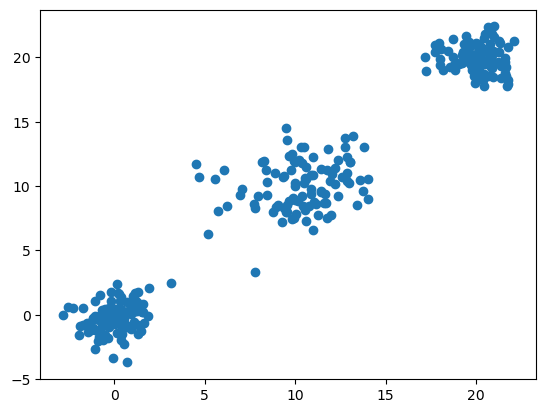

In [1]:
# ---> Create artifitial data 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

n_samples = 100
dim = 2
data1 = np.random.normal(0, 1, (n_samples, dim))
data2 = np.random.normal(10, 2, (n_samples, dim))
data3 = np.random.normal(20, 1, (n_samples, dim))
data = np.concatenate((data1, data2, data3))
plt.scatter(data[:, 0], data[:, 1])

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.02244315  0.01463293]
 [-1.21588916 -1.21407625]
 [ 1.19344601  1.19944332]]


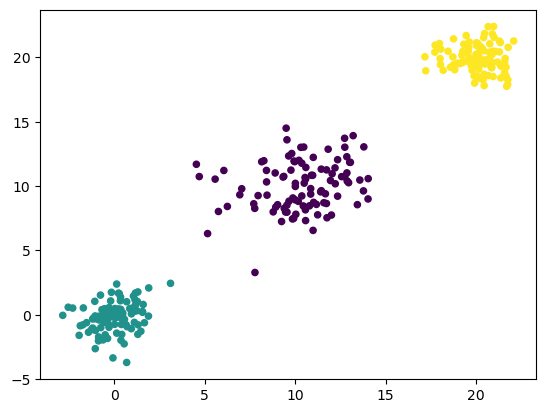

In [2]:
# ---> Apply KMeans 
# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(data_scaled)

# Predict the cluster labels
labels = kmeans.predict(data_scaled)

# Output the cluster labels
# print(labels)

# Centroids of the clusters
centroids = kmeans.cluster_centers_
print(centroids)

# display according to labels 
plt.scatter(data[:, 0], data[:, 1], c=labels, marker='o', s=20)

In [39]:
# ---> Stripes plot definition 
def stripes_plot(data, labels, centroids, title=None):
    '''
        Function to create a stripes plot 
    '''
    k = np.max(labels) + 1 # classes
    for i in range(k):
        # Select the data of the current cluster 
        indices = labels == i 
        data_cluster = data[indices]
        # Compute distances to centroid 
        distances = [np.linalg.norm(point - centroids[i]) for point in data_cluster]
        points = np.array([[i+1, distance] for distance in distances])
        # Plot 
        plt.scatter(points[:, 0], points[:, 1], marker='_', alpha=0.5)
    plt.xticks(labels+1)
    plt.title(title)
    plt.show()

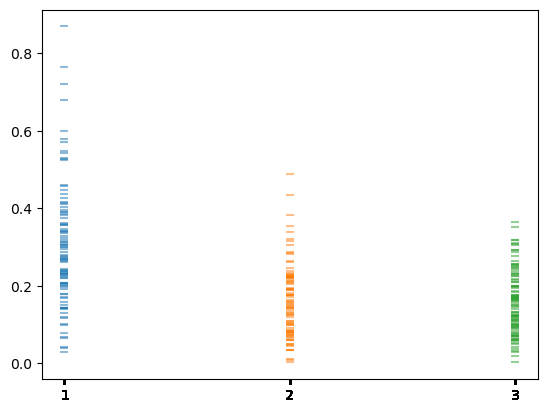

In [4]:
stripes_plot(data_scaled, labels, centroids)

Usa los métodos de agrupamiento vistos en clase para buscar (y evaluar y discutir) grupos en los datos  del heptatlón.

 
Para construir un ${\tt elbow plot}$, puedes calcular para diferentes valores de $k$
$\verb|kmeans(data, k)tot.withinss|$  en ${\cal R}$ o en Python: 

km = KMeans(\text{nclusters=k})

km.fit(data) 

km.inertia 

Aprovecha también el stripes plot del inciso anterior. 

Una posible visualización de los resultados es proyectar los datos y los representantes sobre los primeros dos componentes principal del conjunto (completo) de los datos (aunque tiene sus restricciones por supuesto).


In [5]:
# ---> Read data 
import pandas as pd 

data_hepta = pd.read_csv('./hepatlon ', sep='\s+')
data_hepta = pd.DataFrame(data_hepta)
data_hepta

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411
Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351
Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297
Lajbnerova (CZE),13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252
Bouraga (URS),13.25,1.77,12.62,23.59,6.28,39.06,134.74,6252


In [56]:
# Names of the athletes 
l = data_hepta.shape[0]
names = [data_hepta.iloc[i].name for i in range(l)]
print(names)

['Joyner-Kersee (USA)', 'John (GDR)', 'Behmer (GDR)', 'Sablovskaite (URS)', 'Choubenkova (URS)', 'Schulz (GDR)', 'Fleming (AUS)', 'Greiner (USA)', 'Lajbnerova (CZE)', 'Bouraga (URS)', 'Wijnsma (HOL)', 'Dimitrova (BUL)', 'Scheider (SWI)', 'Braun (FRG)', 'Ruotsalainen (FIN)', 'Yuping (CHN)', 'Hagger (GB)', 'Brown (USA)', 'Mulliner (GB)', 'Hautenauve (BEL)', 'Kytola (FIN)', 'Geremias (BRA)', 'Hui-Ing (TAI)', 'Jeong-Mi (KOR)', 'Launa (PNG)']


In [6]:
# ---> Take a look to data 
desc_stats = data_hepta.describe()
print('Descriptive statistics:\n', desc_stats)

Descriptive statistics:
          hurdles   highjump       shot    run200m   longjump    javelin  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean   13.840000   1.782000  13.117600  24.649200   6.152400  41.482400   
std     0.736648   0.077942   1.491884   0.969557   0.474212   3.545656   
min    12.690000   1.500000  10.000000  22.560000   4.880000  35.680000   
25%    13.470000   1.770000  12.320000  23.920000   6.050000  39.060000   
50%    13.750000   1.800000  12.880000  24.830000   6.250000  40.280000   
75%    14.070000   1.830000  14.200000  25.230000   6.370000  44.540000   
max    16.420000   1.860000  16.230000  26.610000   7.270000  47.500000   

          run800m        score  
count   25.000000    25.000000  
mean   136.054000  6090.600000  
std      8.291088   568.469729  
min    124.200000  4566.000000  
25%    132.240000  5746.000000  
50%    134.740000  6137.000000  
75%    138.480000  6351.000000  
max    163.430000  7291.000000  


Para ayudarnos a tomar una elección informada acerca del número de clusters que nos gustaría considerar, vizualicemos la gráfica de codo de la variación interna para diferente número de clusters. 

[200.         117.2108791   82.81471993  54.76266777  42.18484547
  36.08426003  29.8902006   25.70475332  21.21403432  18.75760606]


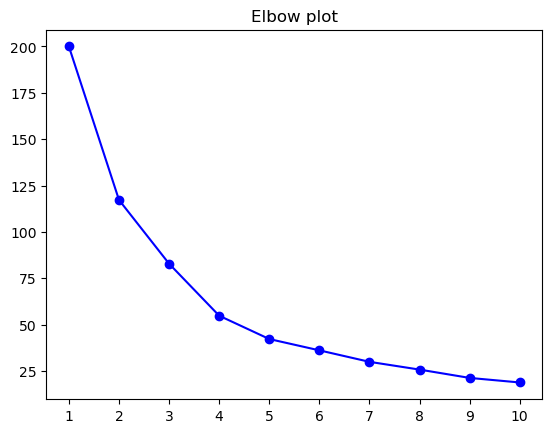

In [37]:
from sklearn.preprocessing import StandardScaler

# Standarize the data
sacaler = StandardScaler()
data_hep_scaled = pd.DataFrame(sacaler.fit_transform(data_hepta))

# Elbow plot 
max_clusters = 10
inertia_collection = np.zeros(max_clusters)
x = list(range(1, max_clusters+1))
for k in range(max_clusters):
    km = KMeans(n_clusters=k+1, n_init=10)
    km.fit(data_hep_scaled)
    inertia_collection[k] = km.inertia_

print(inertia_collection)
plt.plot(x, inertia_collection, 'bo-')
plt.xticks(x)
plt.title('Elbow plot')
plt.show()

Como podemos observar a partir de k=4 parece ser que la variación interna no cambia drasticamente, por lo tanto tomemos como 4 el número de clusters para visualizar nuestros datos. Ahora consideremos un stripes plot.

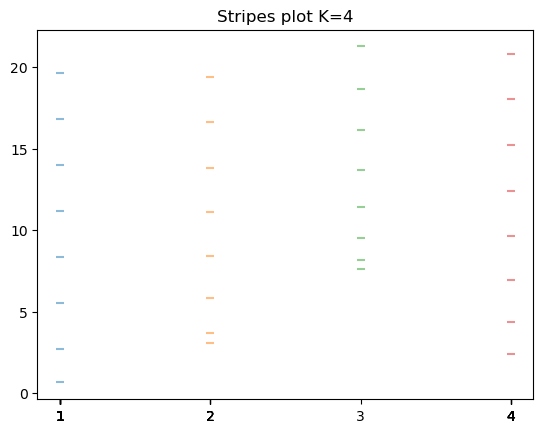

In [43]:
# ---> Clustering and stripes plot with K=4
km = KMeans(n_clusters=4, n_init=10)
km.fit(data_hep_scaled)
labels = km.predict(data_hep_scaled)
centroids = km.cluster_centers_
stripes_plot(
    data=data_hep_scaled, labels=labels, centroids=centroids, title='Stripes plot K=4'
)

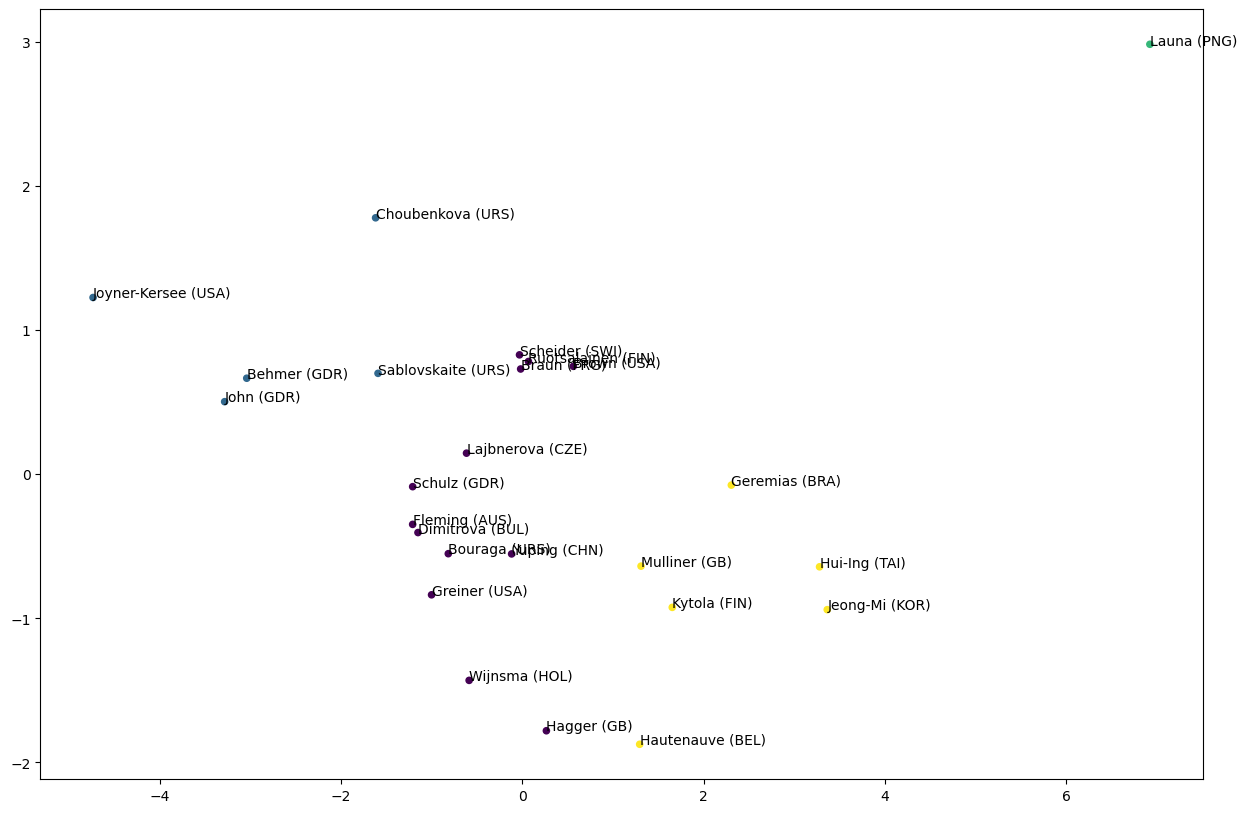

In [59]:
# Apply PCA for visualization 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_transform = pca.fit_transform(data_hep_scaled)

# Visualize clusters in 2D 
plt.figure(figsize=(15, 10))
plt.scatter(data_transform[:, 0], data_transform[:, 1], c=labels, marker='o', s=20)
for i in range(l):
      plt.annotate(names[i], (data_transform[i, 0], data_transform[i, 1]))
plt.tight_layout
plt.show()

Como podemos ver los clusters dados por K-means si tienden a estar cerca y curiosamente vemos que uno de los grupos esta compuesto por un único dato, el cuál resulta ser el atleta con el score más bajo.